# Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize

# Importing Data

In [9]:
data = pd.read_csv("../Data/movies_genre.csv")

# Overview

## Columns

In [10]:
data.columns

Index(['genre_ids', 'overview', 'title', 'Western', 'Romance', 'Horror',
       'TV Movie', 'Fantasy', 'Drama', 'Science Fiction', 'War', 'Music',
       'History', 'Thriller', 'Comedy', 'Crime', 'Mystery', 'Action',
       'Animation', 'Family', 'Adventure'],
      dtype='object')

## Null entries

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   genre_ids        9400 non-null   object
 1   overview         9398 non-null   object
 2   title            9400 non-null   object
 3   Western          9400 non-null   int64 
 4   Romance          9400 non-null   int64 
 5   Horror           9400 non-null   int64 
 6   TV Movie         9400 non-null   int64 
 7   Fantasy          9400 non-null   int64 
 8   Drama            9400 non-null   int64 
 9   Science Fiction  9400 non-null   int64 
 10  War              9400 non-null   int64 
 11  Music            9400 non-null   int64 
 12  History          9400 non-null   int64 
 13  Thriller         9400 non-null   int64 
 14  Comedy           9400 non-null   int64 
 15  Crime            9400 non-null   int64 
 16  Mystery          9400 non-null   int64 
 17  Action           9400 non-null   

In [12]:
data[data.isnull().any(axis=1)]

,genre_ids,overview,title,Western,Romance,Horror,TV Movie,Fantasy,Drama,Science Fiction,...,Music,History,Thriller,Comedy,Crime,Mystery,Action,Animation,Family,Adventure
6981,['Comedy'],NaN,Il grande giorno,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9391,[],NaN,"Amore, bugie e calcetto",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Removing Null Entries

In [14]:
data.dropna(subset=['overview'], inplace=True)

In [15]:
data.shape

(9398, 21)

## Visualizing genres

In [28]:
genre_columns = data.columns[3:]
genre_counts = data[genre_columns].sum()
genre_counts = genre_counts.sort_values(ascending=False)

In [29]:
type(genre_counts)

pandas.core.series.Series

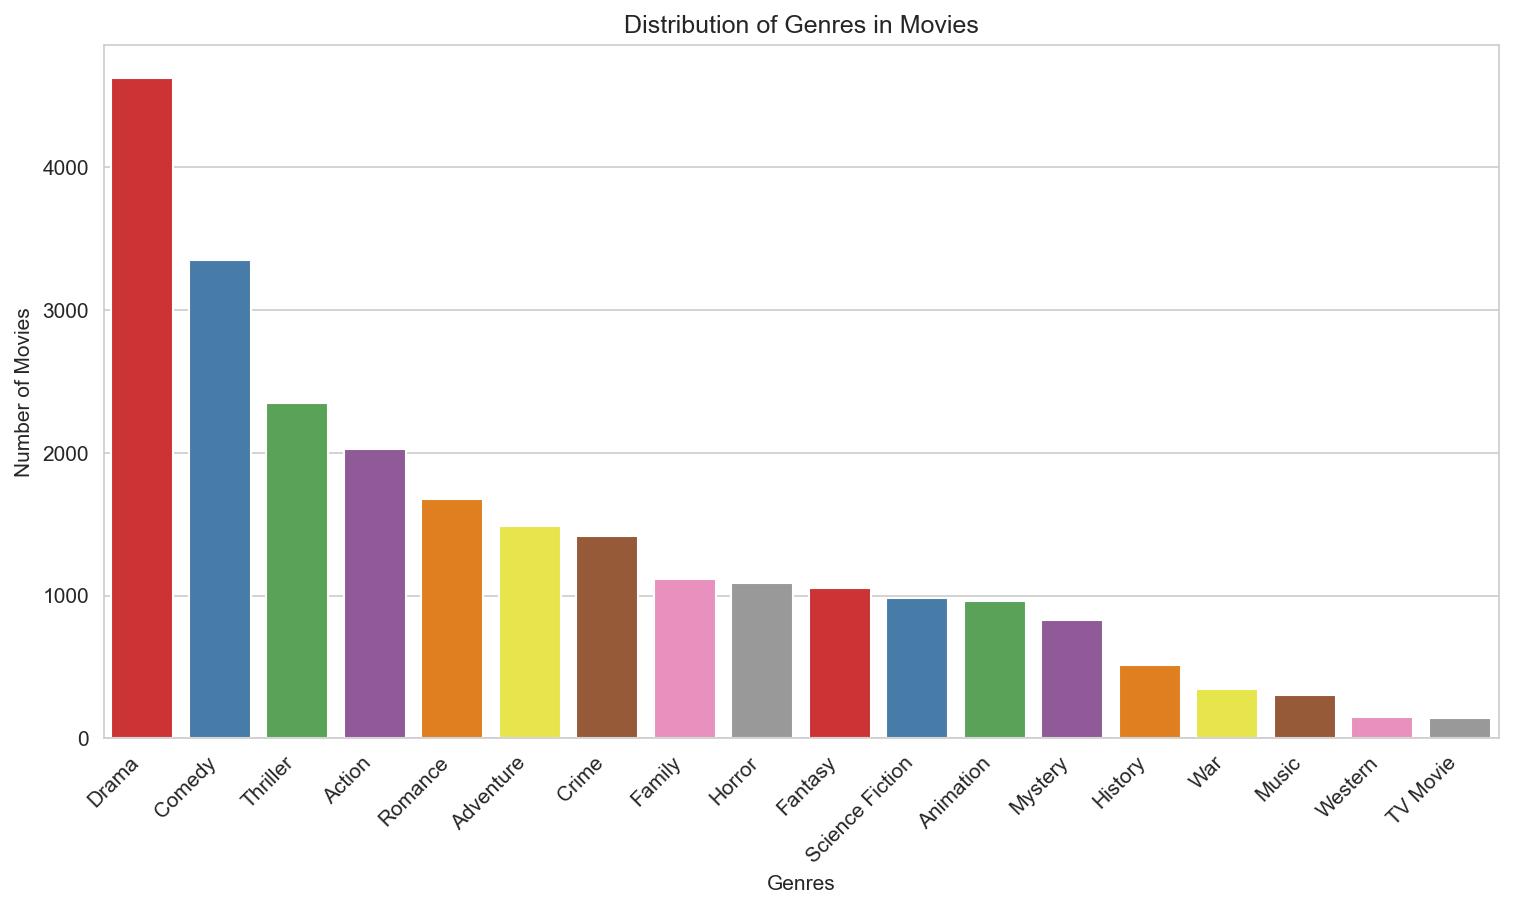

In [73]:
plt.figure(figsize=(12, 6), dpi=150)
sns.set_style("whitegrid")
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')
plt.title('Distribution of Genres in Movies')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

## Length of overview

In [57]:
length = data['overview'].apply(word_tokenize).str.len()

In [67]:
print(length.describe())
print(length.quantile([0.5,0.75,0.9,0.95,0.99]))

count    9398.000000
mean       52.042881
std        26.982003
min         4.000000
25%        30.000000
50%        46.000000
75%        69.000000
max       208.000000
Name: overview, dtype: float64
0.50     46.00
0.75     69.00
0.90     86.00
0.95     99.15
0.99    138.00
Name: overview, dtype: float64


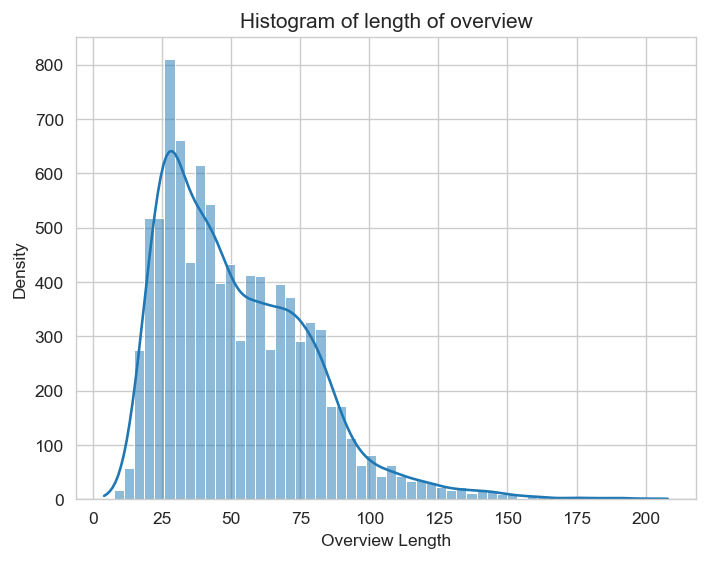

In [78]:
plt.figure(dpi=125)
sns.histplot(length, kde=True)
plt.xlabel("Overview Length")
plt.ylabel("Density")
plt.title("Histogram of length of overview")
plt.show()

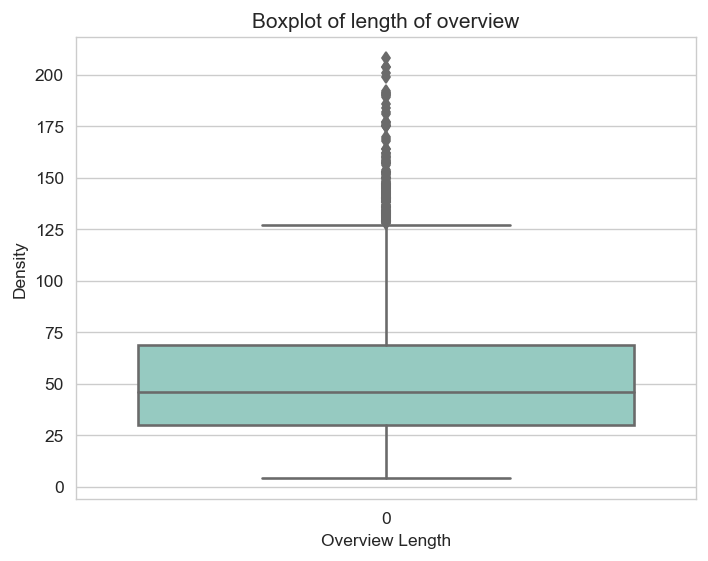

In [80]:
plt.figure(dpi=125)
sns.boxplot(length, palette='Set3')
plt.xlabel("Overview Length")
plt.ylabel("Density")
plt.title("Boxplot of length of overview")
plt.show()

## Genre Heatmap

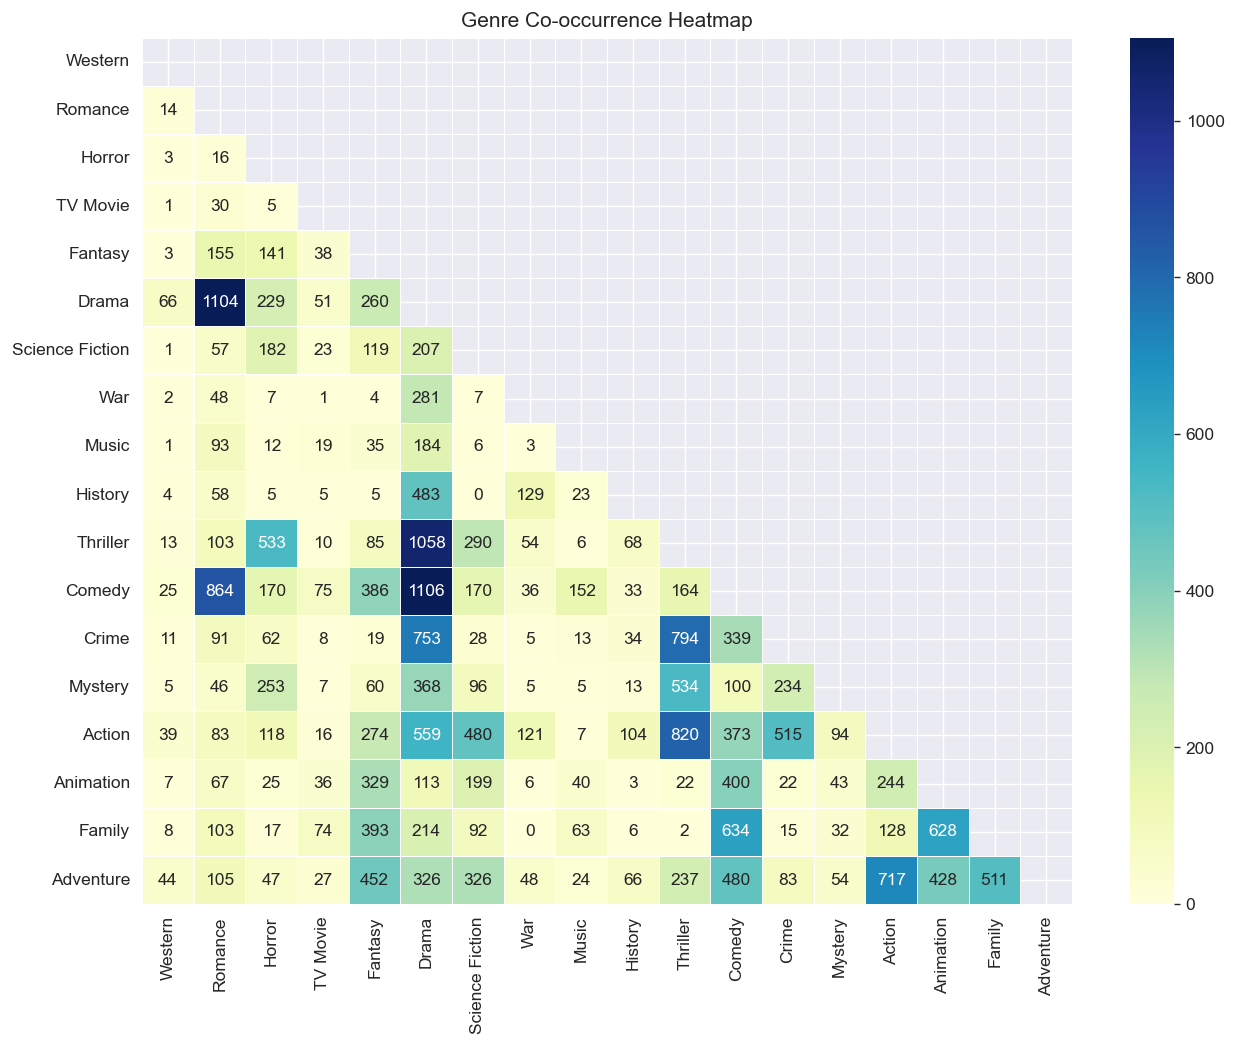

In [72]:
genre_df = data[genre_columns]

# Calculate the co-occurrence matrix
cooccurrence_matrix = genre_df.T @ genre_df

# Create a heatmap
plt.figure(figsize=(12, 9), dpi=125)
mask = np.triu(np.ones_like(cooccurrence_matrix, dtype=bool))
sns.heatmap(cooccurrence_matrix, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, mask=mask)
plt.title("Genre Co-occurrence Heatmap")
plt.show()